## Project Description

You work at the online store "Ice," which sells video games from around the world. Data related to user and expert reviews, genres, platforms (such as Xbox or PlayStation), and historical sales data are available from open sources. In front of you is the data from the year 2016. Let's imagine that it is now December 2016, and you are planning a campaign for the year 2017.

(Currently, the most important thing for you is to gain experience working with data. It doesn't matter whether you are forecasting 2017 sales based on 2016 data or predicting 2027 sales based on 2026 data.).

This dataset includes abbreviations. ESRB stands for the Entertainment Software Rating Board, an independent regulatory organization that evaluates game content and assigns age ratings such as Teen or Mature.

**Project Goal: You need to identify patterns that determine whether a game can be considered successful or not. In doing so, you can find the most promising games and plan advertising campaigns accordingly.**

## Import Library


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import random
from math import factorial
import math

### Import Data Information

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Fixing and Initial Data Exploration

In [5]:
df.columns = df.columns.str.lower()

df.sample(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12428,The Book of Unwritten Tales: The Critter Chron...,PC,2011.0,Action,0.00,0.05,0.00,0.01,NaN,NaN,NaN
12565,Marvel Super Heroes,SAT,1997.0,Fighting,0.00,0.00,0.06,0.00,NaN,NaN,NaN
15539,WRC 2: FIA World Rally Championship,PC,2011.0,Racing,0.00,0.02,0.00,0.00,NaN,NaN,NaN
2868,Crysis,PC,2007.0,Shooter,0.00,0.69,0.00,0.02,91.0,8,M
1056,No Man's Sky,PS4,2016.0,Action,0.63,0.76,0.03,0.27,71.0,4.5,T
7319,Speed Racer: The Videogame,PS2,2008.0,Racing,0.10,0.08,0.00,0.03,NaN,NaN,NaN
4482,Sleeping Dogs,PS4,2014.0,Action,0.16,0.20,0.00,0.07,NaN,NaN,NaN
5094,Trivial Pursuit,X360,2009.0,Misc,0.12,0.21,0.00,0.04,66.0,6.4,E
2568,Guitar Hero: Metallica,X360,2009.0,Misc,0.52,0.20,0.00,0.07,84.0,8.1,T
2626,Madden NFL 16,PS3,2015.0,Sports,0.57,0.06,0.00,0.14,NaN,3.1,E


First, let's change the column names to all lowercase. Once done, we need to modify data types. We should update the "year_of_release" column, but we can't do that yet as some data in the "year_of_release" is missing. There are missing values in the "year_of_release" column, and it seems the quantity is not significant compared to the total data. We can replace these missing values with 0, as well as in the "name" and "genre" columns.

In [6]:
list_columns = ['name','year_of_release','genre']

print(df[list_columns].isna().sum())

name                 2
year_of_release    269
genre                2
dtype: int64


In [7]:
for data in list_columns:
    df[data] = df[data].fillna(0)

We need to change "year_of_release" to an integer because we have just filled in the missing values with 0. If we change it to datetime, it will result in an error.

In [8]:
df['year_of_release'] = df['year_of_release'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Now, let's examine the sales section to see if there's anything that needs fixing.

In [9]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,1974.193599,0.263377,0.145060,0.077617,0.047342,68.967679
std,252.559930,0.813604,0.503339,0.308853,0.186731,13.938165
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


From the data description above, many games did not make any sales at all. If we are selecting those with potential for the future, those with zero sales everywhere do not need further analysis; we will leave them aside since the data for them is already complete with no "NaN" values.

Now, let's proceed to the "critic_score," "user_score," and "rating" columns.

In [10]:
list_column2 = ["critic_score","user_score","rating"]
print(df[list_column2].isna().sum())  


critic_score    8578
user_score      6701
rating          6766
dtype: int64


The missing data is quite substantial; we need to try breaking down its content.

In [11]:
df['critic_score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

In [12]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1         2
0.5       2
1.1       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [13]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

For 'critic_score,' it seems there is no issue with the distribution; a significant amount of data is missing. We don't have references to fill in this missing data, possibly because the game hasn't been reviewed. Even if we were to calculate averages based on genre, it wouldn't be valid as there might be data with no sales but a 'critic_score.'

Regarding ratings, we need to understand the explanations for each rating:

- E = Everyone (suitable for all ages)
- T = Teen (game is suitable for ages 13 and older)
- M = Mature 17+ (game is suitable for ages 17 and older)
- E10+ = Everyone 10+ (game is suitable for ages 10 and older)
- EC = Early Childhood (made for children before school age)
- K-A = Kids to Adults (essentially the same as E, but for older games, updated to E)
- RP = Rating Pending (the game's final rating is yet to be determined)
- AO = Adults Only 18+ (game is specifically for adults, 18+)

From the 'rating' data, it seems that sellers often choose games with ratings E, T, M, E10+.

For 'user_score,' many games still have TBD (To Be Determined). We need to review the TBD entries to understand what characterizes them.

We found a pattern in the data: for games with 'user_score' as "NaN," it can be confirmed that 'rating' and 'critic_score' are also "NaN." This could be because the game has never been played, hence no critic and user scores. We will also examine games with 'user_score' as "NaN."

In [14]:
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


For "user_score," the TBD data needs to be utilized, indicating that this data is still in the process of evaluation.

In [15]:
df[df['user_score'].isna()].sample(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9998,DOA 2: Dead or Alive 2 Hardcore,PS2,2000,Fighting,0.00,0.00,0.11,0.00,NaN,NaN,NaN
15914,Busou Renkin: Youkoso Papillon Park e,PS2,2007,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
11160,Jikkyou Powerful Pro Yakyuu 2012,PSV,2012,Action,0.00,0.00,0.09,0.00,NaN,NaN,NaN
3063,Metro: Last Light,PS4,2014,Action,0.22,0.30,0.04,0.10,NaN,NaN,NaN
4394,Transformers: Revenge of the Fallen (Wii & PS2...,DS,2009,Action,0.26,0.14,0.00,0.04,NaN,NaN,NaN
9076,Okami,PS3,2012,Action,0.00,0.00,0.14,0.00,NaN,NaN,NaN
16415,Really? Really! DS,DS,2009,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
9647,Resident Evil,PS3,2006,Action,0.00,0.00,0.12,0.00,NaN,NaN,NaN
8072,Super Robot Taisen UX,3DS,2013,Role-Playing,0.00,0.00,0.18,0.00,NaN,NaN,NaN
441,Star Wars Episode I Racer,N64,1999,Racing,2.31,0.62,0.14,0.04,NaN,NaN,NaN


If we look at the data above, for "user_score," a rating of "NaN" indicates that the game has not been played. However, we should not discard it because there are still sales data available.

## Improve Data Quality

We need to calculate the total sales (sum of sales in all regions) for each game and enter these values into separate columns.

In [16]:
df['total_sales'] = df['na_sales']+ df['eu_sales'] + df['jp_sales']+df['other_sales']

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


The data above is the final dataset that we will analyze further.

## Deeper Exploratory Data Analysis

We need to find out how many games were released in different years using `.value_counts()`.

In [17]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

Many games were significantly released above the year 2000.



We need to analyze how sales vary from one platform to another. It's necessary to create a new dataset containing platforms and create its distribution based on yearly data. We can achieve this by creating a pivot table.

In [18]:
df_platform_year_sales = pd.pivot_table(df,index=["year_of_release"],columns = "platform", values = "total_sales",aggfunc = "sum")
df_platform_year_sales = df_platform_year_sales.reset_index()

df_platform_year_sales

platform,year_of_release,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,0,10.50,NaN,1.19,NaN,3.34,1.03,4.97,2.20,NaN,...,NaN,NaN,NaN,NaN,NaN,16.33,NaN,10.18,6.17,NaN
1,1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='year_of_release'>

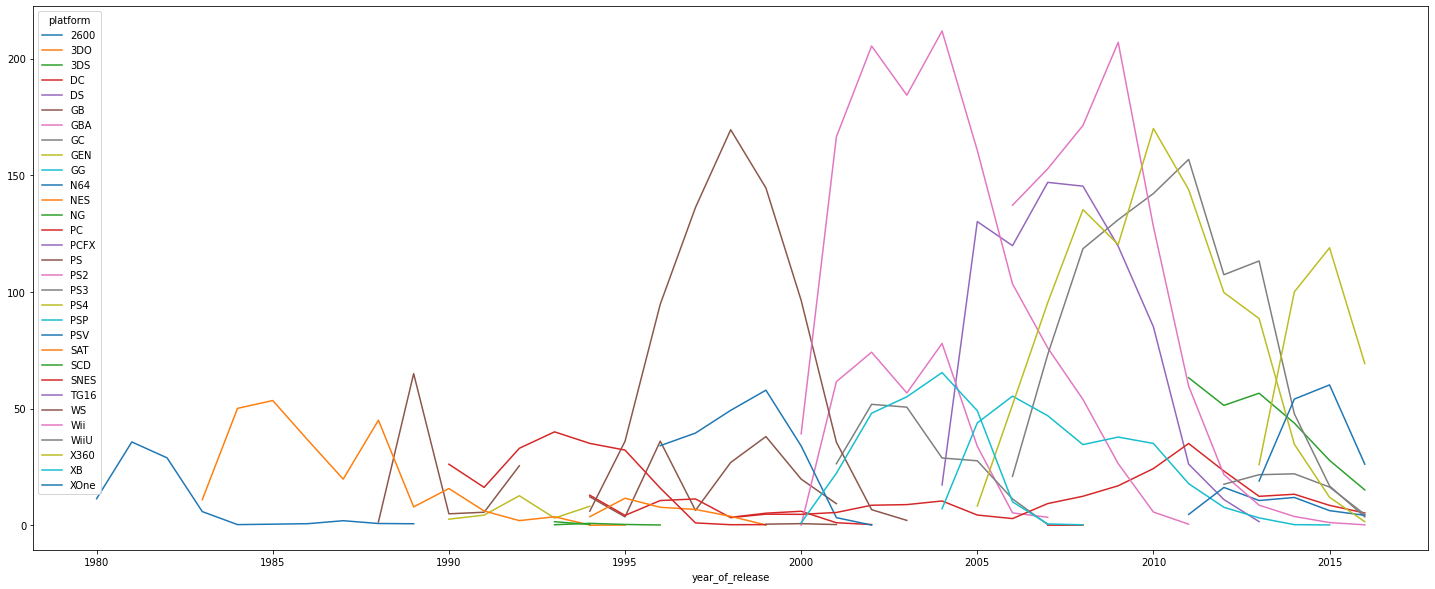

In [19]:
df_platform_year_sales = df_platform_year_sales.query("year_of_release > 0")

df_platform_year_sales.plot(kind="line", figsize = (25,10), x = "year_of_release")


Looking at the data above, it represents all sales each year per platform, and there are numerous platforms. We need to identify which platform has the highest sales, necessitating the creation of another pivot table.

In [20]:
df_platform_year_sales_max = pd.pivot_table(df,index=["platform"],values = "total_sales",aggfunc = "sum")
df_platform_year_sales_max = df_platform_year_sales_max.reset_index()

df_platform_year_sales_max.sort_values('total_sales', ascending= False)

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


It turns out that PS2 has the highest sales. We need to examine its distribution from year to year.

In [21]:
df_ps2 = df.query('platform == "PS2"')
df_ps2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16671,Kanokon: Esuii,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16683,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16689,Real Rode,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Now, let's distribute the data per year.

In [22]:
df_ps2_pivot = pd.pivot_table(df_ps2, index = "year_of_release" , values = "total_sales", aggfunc = 'sum')
df_ps2_pivot

,total_sales
year_of_release,
0,22.21
2000,39.17
2001,166.43
2002,205.38
2003,184.31
2004,211.81
2005,160.66
2006,103.42
2007,75.99


<AxesSubplot:xlabel='year_of_release'>

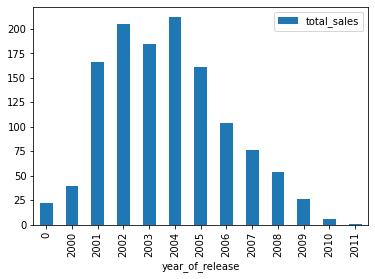

In [23]:
df_ps2_pivot.plot(kind = 'bar')

We can see that the platform that was once popular is "PS2," but now it has either no sales or very few. If we look at the data above, the "PS2" platform was present for approximately 10 years, with the first 5 years being very popular and the following 5 years experiencing a decline in sales. We need to know how long it generally takes for a new platform to emerge and an old platform to fade in popularity. To find the average time, we need to create a new dataframe, find the Min and Max year_of_release for each platform, and then calculate the average. Since some platforms have a release year of 0, which could introduce bias, we need to filter them out first.

In [24]:
df_mean_year_platform = df.query('year_of_release > 0')
df_mean_year_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [25]:
df_mean_years_platform_pivot = pd.pivot_table(df_mean_year_platform, values ="year_of_release", index = 'platform', aggfunc=["min","max"])

df_mean_years_platform_pivot = df_mean_years_platform_pivot.reset_index()

df_mean_years_platform_pivot

df_mean_years_platform_pivot['mean_year_different'] = (df_mean_years_platform_pivot['max'] - df_mean_years_platform_pivot['min'])/2

df_mean_years_platform_pivot

,platform,min,max,mean_year_different
,,year_of_release,year_of_release,
0,2600,1980,1989,4.5
1,3DO,1994,1995,0.5
2,3DS,2011,2016,2.5
3,DC,1998,2008,5.0
4,DS,1985,2013,14.0
5,GB,1988,2001,6.5
6,GBA,2000,2007,3.5
7,GC,2001,2007,3.0
8,GEN,1990,1994,2.0


In [26]:
print(df_mean_years_platform_pivot['mean_year_different'].mean())

3.806451612903226


We can see that the average lifespan of a platform, from emergence to decline, is 4 years. This implies that when we want to make predictions for 2017, we need to create a new dataset and select the data from the last 4 years.

## Clean Data

In [27]:
df_new = df.query("year_of_release > 2012")
df_new.sample(15)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14699,The Great Mystery Hidden Object Package 5,PC,2015,Adventure,0.00,0.03,0.00,0.00,NaN,NaN,NaN,0.03
8421,Mobile Suit Gundam: Extreme VS Force,PSV,2015,Action,0.00,0.00,0.17,0.00,57.0,7.3,E10+,0.17
10868,Super Robot Wars OG: The Moon Dwellers,PS4,2016,Misc,0.00,0.00,0.09,0.00,NaN,NaN,NaN,0.09
13092,The Bureau: XCOM Declassified,PC,2013,Shooter,0.00,0.05,0.00,0.00,66.0,6.5,M,0.05
2468,NCAA Football 14,PS3,2013,Sports,0.75,0.00,0.00,0.09,77.0,6.2,E,0.84
2034,Skylanders SWAP Force,PS3,2013,Platform,0.43,0.42,0.00,0.17,83.0,5.3,E10+,1.02
9798,Rise of the Tomb Raider,PC,2016,Adventure,0.00,0.11,0.00,0.01,86.0,7.9,M,0.12
14274,Yumi's Odd Odyssey,3DS,2013,Platform,0.00,0.00,0.03,0.00,74.0,7.7,E,0.03
14885,God Eater Off Shot: Lindow-hen Twin Pack & Ani...,PS4,2015,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,tbd,M,0.01


### Clean Data Analysis

In [28]:
df_new_platform_sales = pd.pivot_table(df_new,index = "platform" , values = "total_sales" ,aggfunc="sum").reset_index()

df_new_platform_sales.sort_values('total_sales',ascending=False)

,platform,total_sales
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80
8,WiiU,64.63
2,PC,39.43
6,PSV,32.99
7,Wii,13.66
5,PSP,3.50


We can see that the PS4 has the highest sales compared to other platforms. However, we need to examine its year-wise distribution to gain a better understanding.

In [29]:
df_new_platform_year_sales = pd.pivot_table(df_new,index=["platform"],columns = "year_of_release", values = "total_sales",aggfunc = "sum")
df_new_platform_year_sales = df_new_platform_year_sales.reset_index()

df_new_platform_year_sales

year_of_release,platform,2013,2014,2015,2016
0,3DS,56.57,43.76,27.78,15.14
1,DS,1.54,NaN,NaN,NaN
2,PC,12.38,13.28,8.52,5.25
3,PS3,113.25,47.76,16.82,3.60
4,PS4,25.99,100.00,118.90,69.25
5,PSP,3.14,0.24,0.12,NaN
6,PSV,10.59,11.90,6.25,4.25
7,Wii,8.59,3.75,1.14,0.18
8,WiiU,21.65,22.03,16.35,4.60
9,X360,88.58,34.74,11.96,1.52


<AxesSubplot:xlabel='platform'>

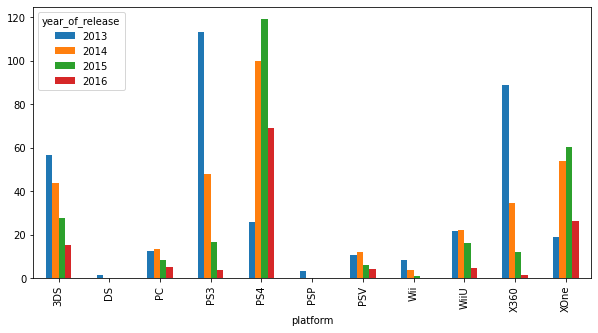

In [30]:
df_new_platform_year_sales.plot(kind="bar", figsize = (10,5), x = "platform")

The platform with the highest sales is PS4, and we can observe the growth or decline of various platforms from the graph above. XOne and PS4P experienced growth and then a decline in 2016, while others have been in decline since 2015. If we look at the potential for profit, PS4 and XOne seem promising, despite a decline in 2016, as there is still an opportunity for sales.

In [31]:
df_new_platform_year_sales_mean = pd.pivot_table(df_new,index=["platform"],columns = "year_of_release", values = "total_sales",aggfunc = "mean")
df_new_platform_year_sales_mean = df_new_platform_year_sales_mean.reset_index()

df_new_platform_year_sales_mean

year_of_release,platform,2013,2014,2015,2016
0,3DS,0.621648,0.547000,0.323023,0.329130
1,DS,0.192500,NaN,NaN,NaN
2,PC,0.325789,0.282553,0.170400,0.097222
3,PS3,0.898810,0.442222,0.230411,0.094737
4,PS4,1.624375,1.333333,0.867883,0.422256
5,PSP,0.058148,0.024000,0.040000,NaN
6,PSV,0.168095,0.119000,0.056818,0.050000
7,Wii,0.715833,0.625000,0.285000,0.180000
8,WiiU,0.515476,0.710645,0.583929,0.328571
9,X360,1.181067,0.551429,0.341714,0.116923


<AxesSubplot:>

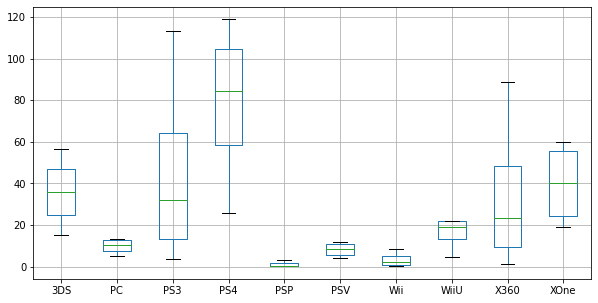

In [32]:
df_new_platform_year_sales_boxplot = pd.pivot_table(df_new,index=["year_of_release"],columns = "platform", values = "total_sales",aggfunc = "sum")
df_new_platform_year_sales_boxplot = df_new_platform_year_sales_boxplot.reset_index()

df_new_platform_year_sales_boxplot.boxplot( column = ['3DS','PC','PS3','PS4','PSP','PSV','Wii','WiiU','X360','XOne'], figsize =(10,5))

The differences in sales vary for each platform. For PSP, it seems there are no more sales, and the significant differences are noticeable for PS3, PS4, XOne, and X360 between the min and max. The average sales for each platform from year to year also tend to decrease, as seen in "df_new_platform_year_sales_mean." For further analysis, we will focus on PS4 as it has the highest sales. We will examine its correlation with ratings.

In [33]:
df_ps4_scatter = df_new[df_new['platform'] == "PS4"]
df_ps4_scatter

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

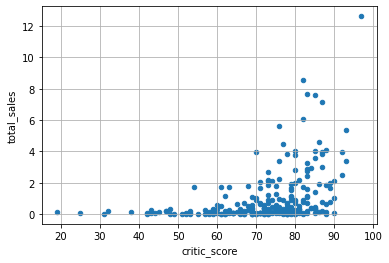

In [34]:
df_ps4_scatter.plot(kind='scatter',x='critic_score',y='total_sales',grid=True)

We can see from the table above that for critic_score, the higher the score, the likelihood of sales and revenue increases. This indicates an influence on game/platform sales. Now, let's examine user_score, but we need to check if there are values with "tbd" and how many there are.

In [35]:
print(len(df_ps4_scatter[df_ps4_scatter['user_score'] ==  'tbd']))

6


There are 6 out of 376 data with "tbd," meaning we can still analyze to determine whether it also has an impact.

In [36]:
df_ps4_scatter_wo_tbd = df_ps4_scatter.query('user_score != "tbd"')
df_ps4_scatter_wo_tbd = df_ps4_scatter_wo_tbd.dropna(subset=['user_score'])
df_ps4_scatter_wo_tbd['user_score'] = df_ps4_scatter_wo_tbd['user_score'].astype(float)
df_ps4_scatter_wo_tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42.0,2.3,E10+,0.01
16499,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,70.0,6.8,T,0.01
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01


Additionally, we also need to remove "NaN" values in user_score so that correlation can be calculated.

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

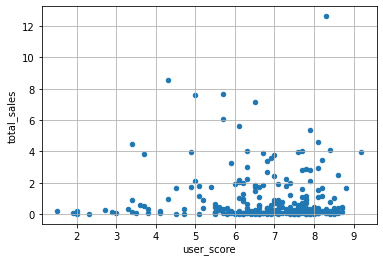

In [37]:
df_ps4_scatter_wo_tbd.plot(kind='scatter',x='user_score',y='total_sales',grid=True)

The scatter plot results from "df_ps4_scatter_wo_tbd" also indicate that as user score increases, there is a higher chance of sales for the game/platform. Now, let's substantiate this observation with numerical data.

In [38]:
print(df_ps4_scatter['critic_score'].corr(df_ps4_scatter['total_sales']))
print(df_ps4_scatter_wo_tbd['user_score'].corr(df_ps4_scatter_wo_tbd['total_sales']))

0.40656790206178095
-0.031957110204556424


From the results above, it is evident that critic_score has a strong positive correlation with sales, while user_score has a negative correlation with sales, although the correlation is not as strong. This implies that the score from professional critics has a significant impact on sales, whereas user scores, in general, do not contribute significantly to sales.

Sure, you can create scatter plots for other platforms

korelasi terhadap professional: 3DS
None 0.3570566142288103
korelasi user: 3DS
None 0.24150411773563016
korelasi terhadap professional: PC
None 0.19603028294369382
korelasi user: PC
None -0.0938418695247674
korelasi terhadap professional: PS3
None 0.3342853393371919
korelasi user: PS3
None 0.0023944027357566925
korelasi terhadap professional: PS4
None 0.40656790206178095
korelasi user: PS4
None -0.031957110204556424
korelasi terhadap professional: PSP
None nan
korelasi user: PSP
None -0.9999999999999999


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


korelasi terhadap professional: PSV
None 0.2547423503068656
korelasi user: PSV
None 0.0009424723319108626
korelasi terhadap professional: Wii
None nan
korelasi user: Wii
None 0.6829417215362368
korelasi terhadap professional: WiiU
None 0.3764149065423912
korelasi user: WiiU
None 0.4193304819266187
korelasi terhadap professional: X360
None 0.3503445460228664
korelasi user: X360
None -0.011742185147181342
korelasi terhadap professional: XOne
None 0.4169983280084017
korelasi user: XOne
None -0.06892505328279414
XOne


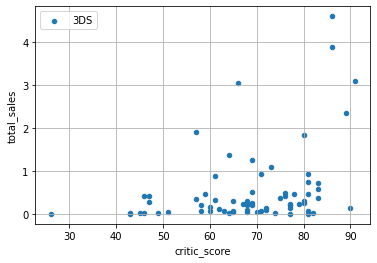

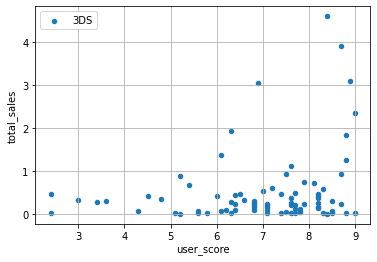

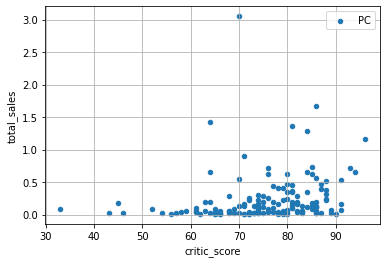

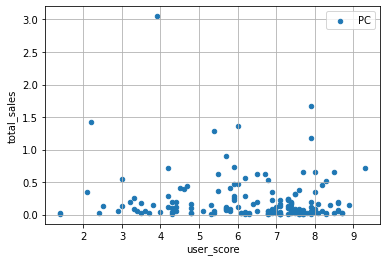

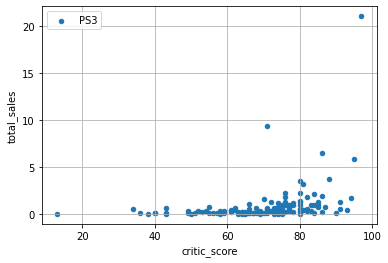

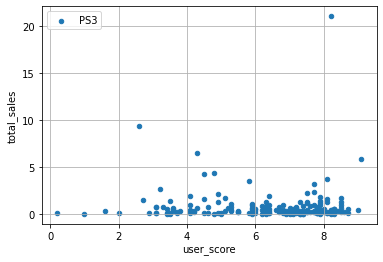

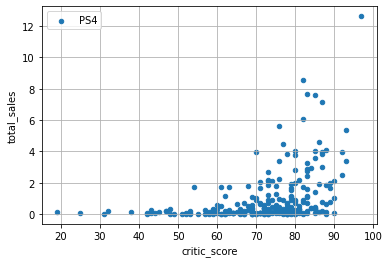

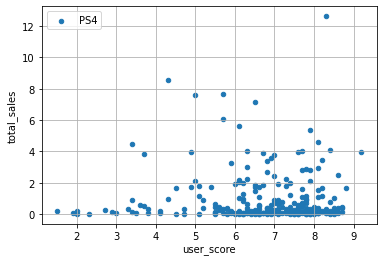

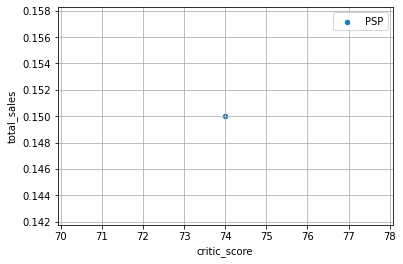

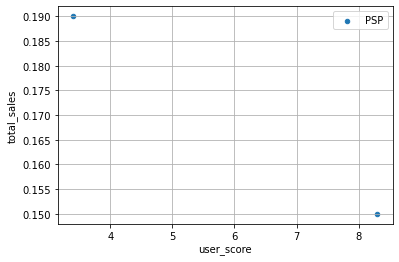

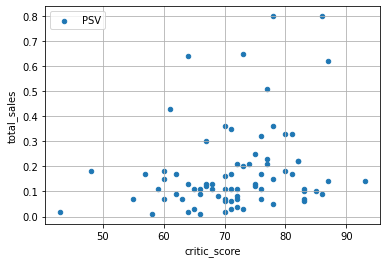

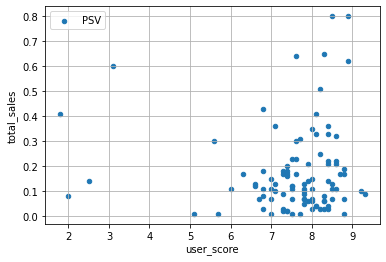

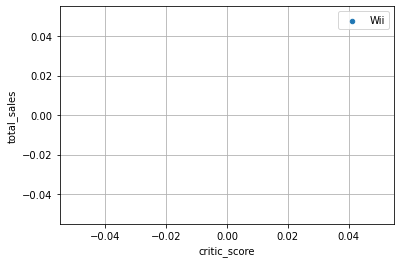

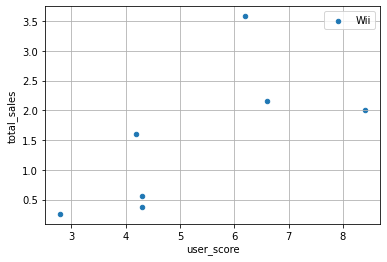

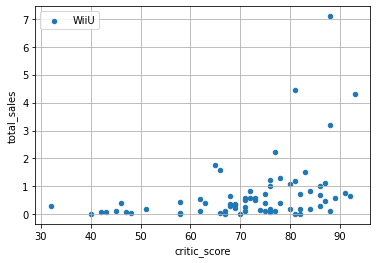

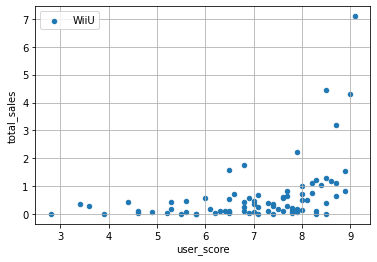

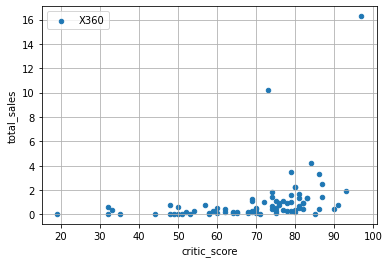

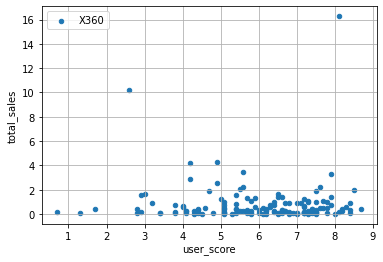

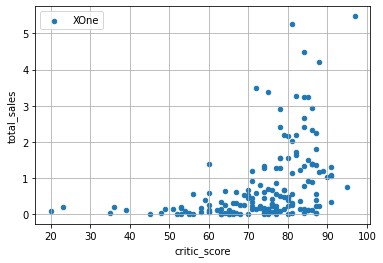

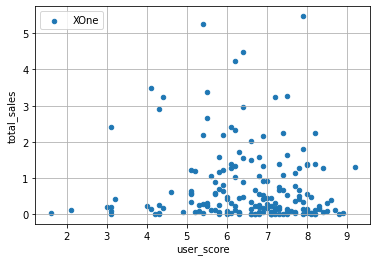

In [39]:
listed_columns = ['3DS','PC','PS3','PS4','PSP','PSV','Wii','WiiU','X360','XOne']

for data in listed_columns:
    df_columns_scatter = df_new[df_new['platform'] == data ]
    df_columns_scatter.plot(kind='scatter',x='critic_score',y='total_sales',grid=True, label = data) 
    print(print("korelasi terhadap professional:",data),df_columns_scatter['critic_score'].corr(df_columns_scatter['total_sales']))
    df_columns_scatter_wo_tbd = df_columns_scatter.query('user_score != "tbd"')
    df_columns_scatter_wo_tbd = df_columns_scatter_wo_tbd.dropna(subset=['user_score'])
    df_columns_scatter_wo_tbd['user_score'] = df_columns_scatter_wo_tbd['user_score'].astype(float)
    df_columns_scatter_wo_tbd.plot(kind='scatter',x='user_score',y='total_sales',grid=True, label = data)
    print(print("korelasi user:",data),df_columns_scatter_wo_tbd['user_score'].corr(df_columns_scatter_wo_tbd['total_sales']))

print(data)

We have obtained scatter plots and correlations for each platform, and we need to dissect:

* Correlation with professionals: 3DS, 0.3570566142288103
  Correlation with users: 3DS, 0.24150411773563016

* Correlation with professionals: PC, 0.19603028294369382
  Correlation with users: PC, -0.0938418695247674

* Correlation with professionals: PS3, 0.3342853393371919
  Correlation with users: PS3, 0.0023944027357566925

* Correlation with professionals: PS4, 0.40656790206178095
  Correlation with users: PS4, -0.031957110204556424

* Correlation with professionals: PSP, None (NaN)
  Correlation with users: PSP, -0.9999999999999999

* Correlation with professionals: PSV, None (NaN)
  Correlation with users: PSV, 0.2547423503068656

* Correlation with professionals: Wii, None (NaN)
  Correlation with users: Wii, 0.6829417215362368

* Correlation with professionals: WiiU, None, 0.3764149065423912
  Correlation with users: WiiU, 0.4193304819266187

* Correlation with professionals: X360, None, 0.3503445460228664
  Correlation with users: X360, -0.011742185147181342

* Correlation with professionals: XOne, None, 0.4169983280084017
  Correlation with users: XOne, -0.06892505328279414

In general, the correlation with professionals tends to have a positive correlation compared to user correlations, with some being negative. Some platforms have strong correlations, while others do not.
3DS, PS3, PS4, WiiU, X360, and XOne have a strong correlation for professional assessments. For user assessments, 3DS, Wii, and WiiU have a strong and positive correlation, while the rest have a negative and not strong enough correlation.

Now we need to dissect the genre section, identifying which genre is the most popular and widely purchased.

In [40]:
df_new_genre = pd.pivot_table(df_new,index = "genre", values = 'total_sales', aggfunc = 'sum')
df_new_genre.reset_index().sort_values('total_sales', ascending = False)

,genre,total_sales
0,Action,321.87
8,Shooter,232.98
10,Sports,150.65
7,Role-Playing,145.89
3,Misc,62.82
4,Platform,42.63
6,Racing,39.89
2,Fighting,35.31
1,Adventure,23.64
9,Simulation,21.76


For genres, we can observe that Action is the most popular genre among all genres.

### Analysis of User Profiling for Each Region

In [41]:
df_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [42]:
df_new_genre = pd.pivot_table(df_new, index = "genre",values = ["na_sales","eu_sales","jp_sales","other_sales","total_sales"],aggfunc = 'sum')
df_new_genre.reset_index().sort_values('total_sales', ascending = False)

,genre,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,Action,118.13,40.49,126.05,37.20,321.87
8,Shooter,87.86,6.61,109.74,28.77,232.98
10,Sports,60.52,5.41,65.27,19.45,150.65
7,Role-Playing,36.97,51.04,46.40,11.48,145.89
3,Misc,20.04,9.20,27.49,6.09,62.82
4,Platform,15.58,4.79,18.14,4.12,42.63
6,Racing,20.19,2.30,12.96,4.44,39.89
2,Fighting,8.55,7.65,15.55,3.56,35.31
1,Adventure,8.25,5.82,7.14,2.43,23.64
9,Simulation,10.92,4.52,4.86,1.46,21.76


For the genre that generates the highest sales when broken down by region, in the EU region, Action is the genre that generates the most revenue, followed by Shooter. In the JP region, Role-Playing is the highest revenue-generating genre, followed by Action. In the NA region, Action is the genre that generates the highest revenue, followed by Shooter.

In [43]:
df_new_genre = pd.pivot_table(df_new, index = "platform",values = ["na_sales","eu_sales","jp_sales","other_sales","total_sales"],aggfunc = 'sum')
df_new_genre.reset_index().sort_values('total_sales', ascending = False)

,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales
4,PS4,141.09,15.96,108.74,48.35,314.14
3,PS3,67.81,23.35,63.50,26.77,181.43
10,XOne,51.59,0.34,93.12,14.27,159.32
0,3DS,30.96,67.81,38.20,6.28,143.25
9,X360,42.52,0.51,81.66,12.11,136.80
8,WiiU,19.85,10.88,29.21,4.69,64.63
2,PC,25.36,0.00,11.11,2.96,39.43
6,PSV,6.10,18.59,5.04,3.26,32.99
7,Wii,5.93,0.05,6.56,1.12,13.66
5,PSP,0.17,3.29,0.00,0.04,3.50


For the platform that generates the highest sales when broken down by region, in the EU region, PS4 is the platform that generates the most revenue, followed by PS3. In the JP region, 3DS is the highest revenue-generating platform, followed by PS3. In the NA region, PS4 is the platform that generates the highest revenue, followed by XOne.

In [44]:
df_new_genre = pd.pivot_table(df_new, index = "rating",values = ["na_sales","eu_sales","jp_sales","other_sales","total_sales"],aggfunc = 'sum')
df_new_genre.reset_index().sort_values('total_sales', ascending = False)

,rating,eu_sales,jp_sales,na_sales,other_sales,total_sales
2,M,145.32,14.11,165.21,47.04,371.68
0,E,83.36,15.14,79.05,22.61,200.16
3,T,41.95,20.59,49.79,14.29,126.62
1,E10+,42.69,5.89,54.24,12.57,115.39


Certainly, here's a recap of the explanations for each rating:

- E = Everyone (suitable for all ages)
- T = Teen (game can be played by teenagers, minimum age 13+)
- M = Mature 17+ (game can be played for individuals aged 17 and older)
- E10+ = Everyone 10+ (game can be played for individuals aged 10 and older)

It turns out that the rating that generates the highest revenue is Rating M, which means games suitable for individuals aged 17 and older, followed by Rating E (suitable for all ages), then T (teenagers), and E10+ (everyone aged 10 and older). When looking at the sales distribution, Rating M and E could be preferred choices.

For the rating that generates the highest sales when broken down by region:
- In the EU region, Rating M generates the most revenue, followed by Rating E.
- In the JP region, Rating T is the highest revenue-generating, followed by Rating E.
- In the NA region, Rating M generates the highest revenue, followed by Rating E.

## Hypothesis Testing

Here is the hypothesis that needs further investigation:

* The average user_rating for the Xbox One and PC platforms is the same.

In [45]:
df_Xbox_One_hip = df_new[df_new['platform'] == "XOne"]
df_Xbox_One_hip = df_Xbox_One_hip.query('user_score != "tbd"')
df_Xbox_One_hip = df_Xbox_One_hip.dropna(subset=['user_score'])
df_Xbox_One_hip = df_Xbox_One_hip['user_score'].astype(float)

In [46]:
df_PC_hip = df_new[df_new['platform'] == "PC"]
df_PC_hip = df_PC_hip.query('user_score != "tbd"')
df_PC_hip = df_PC_hip.dropna(subset=['user_score'])
df_PC_hip = df_PC_hip['user_score'].astype(float)

In [47]:
df_Xbox_One_hip = df_Xbox_One_hip
df_PC_hip = df_PC_hip


alpha = 0.05

results = st.ttest_ind(df_Xbox_One_hip,df_PC_hip,equal_var = False)

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value: 0.14759594013430463
Kita tidak dapat menolak hipotesis nol


If the p-value is greater than alpha, it means that the average user_rating for the Xbox One and PC platforms is different.

The average user_rating for users of the Action and Sports genres is different.

In [48]:
df_action_hip = df_new[df_new['genre'] == "Action"]
df_action_hip = df_action_hip.query('user_score != "tbd"')
df_action_hip = df_action_hip.dropna(subset=['user_score'])
df_action_hip = df_action_hip['user_score'].astype(float)

In [49]:
df_sport_hip = df_new[df_new['genre'] == "Action"]
df_sport_hip = df_sport_hip.query('user_score != "tbd"')
df_sport_hip = df_sport_hip.dropna(subset=['user_score'])
df_sport_hip = df_sport_hip['user_score'].astype(float)

In [50]:
df_action_hip = df_action_hip
df_sport_hip = df_sport_hip


alpha = 0.05

results = st.ttest_ind(df_action_hip,df_sport_hip,equal_var = False)

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value: 1.0
Kita tidak dapat menolak hipotesis nol


If the p-value is greater than alpha, it means that the average user_rating for users of the Action and Sports genres is *different*.

# Project Summary

### Project Summary:

The project aims to identify patterns determining whether a game can be considered successful, allowing for the discovery of the most promising games and planning advertising campaigns. Based on the analyzed data, several criteria have the potential to achieve sales in 2017, leading to the discovery of the most promising games.

Considering data from 2013 to 2016, focusing on recent years due to the aging relevance of platforms, the top 5 platforms over the last 4 years are PS4, PS3, XOne, 3DS, and X360, with a declining trend. We select the top 3 platforms for future consideration: PS4, XOne, and 3DS.

For future planning, it is essential to create ratings for each game, prioritizing professional ratings over user ratings, as they have a more significant impact.

The top 4 selling genres are Action, Shooter, Sports, and Role-Playing, with exceptional sales compared to other genres.

Now, let's delve into specific zone areas:
- **EU Zone:**
  * Top Genres: Action and Shooter
  * Top Platforms: PS4, PS3, XOne
  * Preferred Ratings: All ESRB ratings (M, E, T, E10+)

- **JP Zone:**
  * Top Genres: Action and Role-Playing
  * Top Platforms: 3DS, PS3, PSV
  * Preferred Ratings: All ESRB ratings (M, E, T)

- **NA Zone:**
  * Top Genres: Action and Shooter
  * Top Platforms: PS4, XOne, X360
  * Preferred Ratings: All ESRB ratings (M, E, T, E10+)

These insights will be crucial for designing effective advertising campaigns tailored to each zone, focusing on the most profitable genres, platforms, and rating categories.